### Import 

In [51]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

# data visualization
import seaborn as sns

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# evaluation 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.svm import SVC

import warnings


In [2]:
warnings.filterwarnings("ignore")

### Import data

In [3]:
#load csv file
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")


In [52]:
#train data checked
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA 

In [53]:
#information about the training
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train = train_data.loc[:,['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
#missing values with mean column values
train.fillna(train.mean(), inplace=True)
# NaN values in each column
train.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [9]:
# drop rows with missing values 2 row2 NAN in Embarked
train.dropna(inplace = True)

In [54]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [55]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22,1,0,7,1
1,2,1,1,1,38,1,0,71,0
2,3,1,3,1,26,0,0,8,1
3,4,1,1,1,35,1,0,53,1
4,5,0,3,0,35,0,0,8,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13,1
887,888,1,1,1,19,0,0,30,1
888,889,0,3,1,29,1,2,23,1
889,890,1,1,0,26,0,0,30,0


### Numeric convert

In [12]:
#Convert object to int
train.replace({ 'Sex': {'male':0 , 'female':1} , 'Embarked' : {'C': 0 , 'S': 1, 'Q':2}} ,inplace=True)

In [13]:
#Convert Age float to int
train['Age'] = train['Age'].astype(int)

In [14]:
# convert fare round anf float to int
train["Fare"] = np.round(train["Fare"])
train["Fare"] = train["Fare"].astype(int)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    int64
 1   Survived     889 non-null    int64
 2   Pclass       889 non-null    int64
 3   Sex          889 non-null    int64
 4   Age          889 non-null    int32
 5   SibSp        889 non-null    int64
 6   Parch        889 non-null    int64
 7   Fare         889 non-null    int32
 8   Embarked     889 non-null    int64
dtypes: int32(2), int64(7)
memory usage: 102.5 KB


#### Analysis of categorical columns

In [57]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<AxesSubplot:>

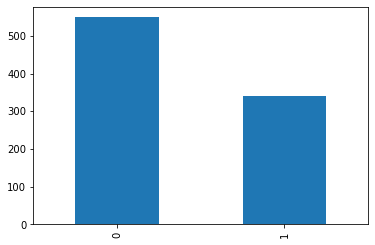

In [17]:
train['Survived'].value_counts().plot(kind='bar')

In [18]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex  Survived
0    0           468
     1           109
1    0            81
     1           231
Name: Survived, dtype: int64

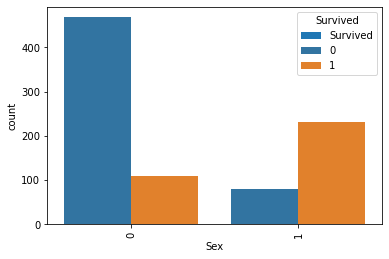

In [19]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
sns.countplot('Sex',hue='Survived',data=train,)
plt.show()

In [58]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True)

Pclass          1    2    3  All
Sex Survived                    
0   0          77   91  300  468
    1          45   17   47  109
1   0           3    6   72   81
    1          89   70   72  231
All           214  184  491  889

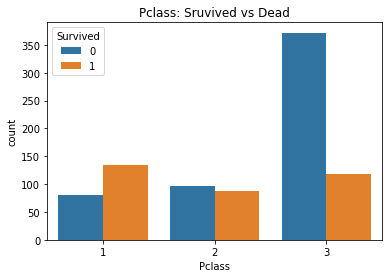

In [59]:
sns.countplot('Pclass', hue='Survived', data=train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

<AxesSubplot:>

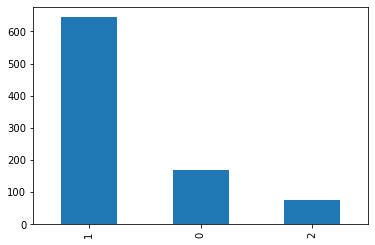

In [22]:
train['Embarked'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

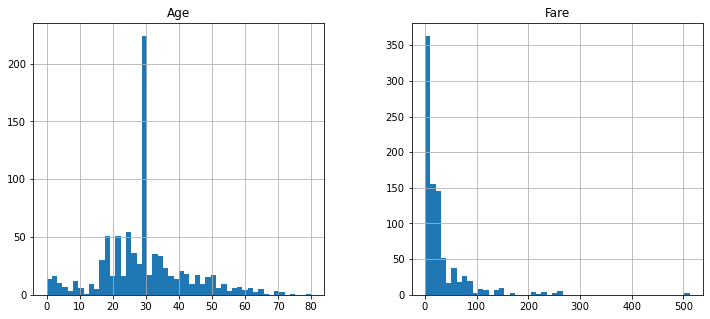

In [23]:
train[['Age', 'Fare']].hist(bins=50, figsize=(12,5))

#### ROC curve

In [153]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

## Model Train

In [84]:
X = train.drop(['PassengerId','Survived'],axis = 1)
y = train['Survived']
print(X.shape)
print(y.shape)
X

(889, 7)
(889,)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7,1
1,1,1,38,1,0,71,0
2,3,1,26,0,0,8,1
3,1,1,35,1,0,53,1
4,3,0,35,0,0,8,1
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13,1
887,1,1,19,0,0,30,1
888,3,1,29,1,2,23,1
889,1,0,26,0,0,30,0


#### SVM

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [96]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [98]:
y_pred_svm = svclassifier.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  84.75336322869956


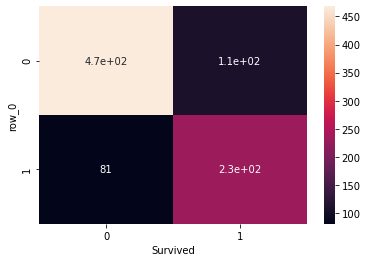

In [164]:
confusion_matrix = pd.crosstab(svclassifier.predict(X),y)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

#### RandomForest

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state = 4)

In [117]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [120]:
rfc_pred_test = rfc.predict(X_test)

In [122]:
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.7586206896551726


In [162]:
confusion_matrix = pd.crosstab(rfc.predict(X),y)

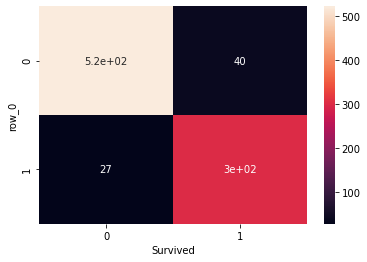

In [163]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [184]:
y_scores = rfc.predict_proba(X_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

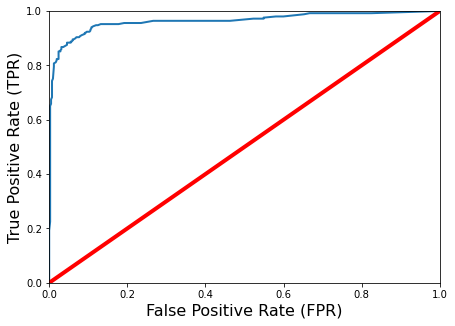

In [186]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

#### Logistic Regression

In [126]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [128]:
y_pred = logreg.predict(X_test)

In [130]:
print('The accuracy of Logistic Regression is: ', (metrics.accuracy_score(y_test, y_pred)))

The accuracy of Logistic Regression is:  0.7982062780269058


In [159]:
confusion_matrix = pd.crosstab(logreg.predict(X),y)

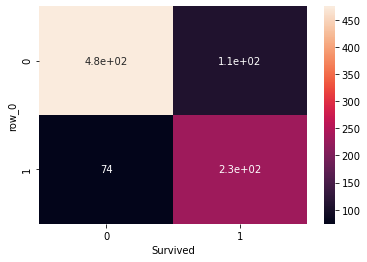

In [160]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [187]:
y_scores = logreg.predict_proba(X_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

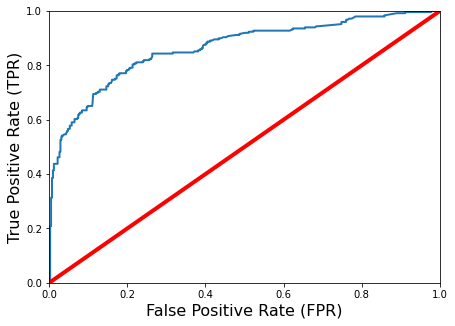

In [188]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

#### Decision tree

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [139]:
classifier_Decicsion = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_Decicsion.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [149]:
y_pred_Decision = classifier_Decicsion.predict(X_test)

In [145]:
accuracy_score(y_test,y_pred_Decision)

0.7533632286995515

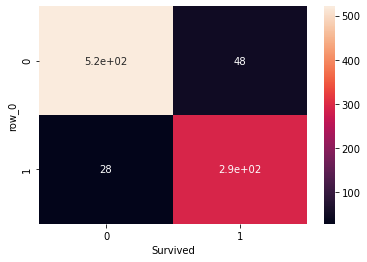

In [165]:
confusion_matrix = pd.crosstab(classifier_Decicsion.predict(X),y)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [191]:
y_scores = classifier_Decicsion.predict_proba(X_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

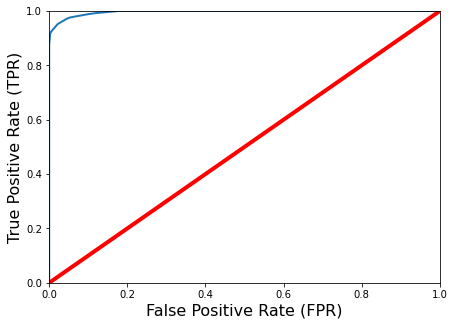

In [192]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### Nave byas

In [150]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [151]:
y_pred = gaussian.predict(X_test)

In [152]:
acc_gaussian = round(accuracy_score(y_test, y_pred) * 100, 2)
print(acc_gaussian)

74.44


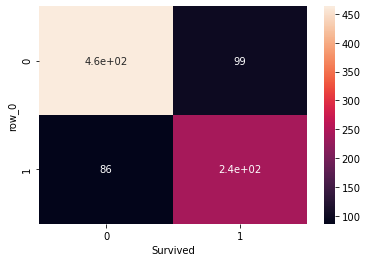

In [166]:
confusion_matrix = pd.crosstab(gaussian.predict(X),y)
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [193]:
y_scores = gaussian.predict_proba(X_train)
y_scores = y_scores[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

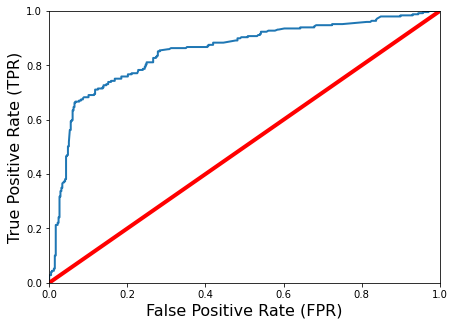

In [194]:
plt.figure(figsize=(7, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()